In [1]:
import textblob as tb
import numpy as np
import pandas as pd
import nltk

In [2]:
from twitter_helper import TweetTimeLineHelper, processTweet

### Fetch tweets from Twitter
only for update

In [39]:
# timeLineHelper = TweetTimeLineHelper(items=5000)
# timeLineHelper.saveToCsv()

In [42]:
tweets = pd.read_csv('tweets.csv')

In [84]:
tweets['tweet_processed'] = tweets['text'].apply(processTweet)
tweets

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_probability_neg,sentiment_probability_pos,sentiment_classfication_negative,sentiment_classfication_positive
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at n...,29,393,False,tesla add power lift gate cost,0.394628,0.605372,0,1
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make...",19,121,False,agreed hydrogen fool sell make sense,0.505230,0.494770,1,0
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck,0.463178,0.536822,0,1
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from...",170,2842,False,also get lithium australia,0.517546,0.482454,1,0
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want!...,877,3663,False,coup whoever want deal,0.371226,0.628774,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year,0.482999,0.517001,0,1
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️,0.499708,0.500292,0,1
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connecto...,70,1678,False,appears wiring/connector issue,0.723233,0.276767,1,0
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try aga...,531,14533,False,igniter need inspected try tomorrow time,0.709884,0.290116,1,0


In [117]:
all_words = []
for sentence in tweets['tweet_processed'].tolist():
    all_words.extend(sentence.split())

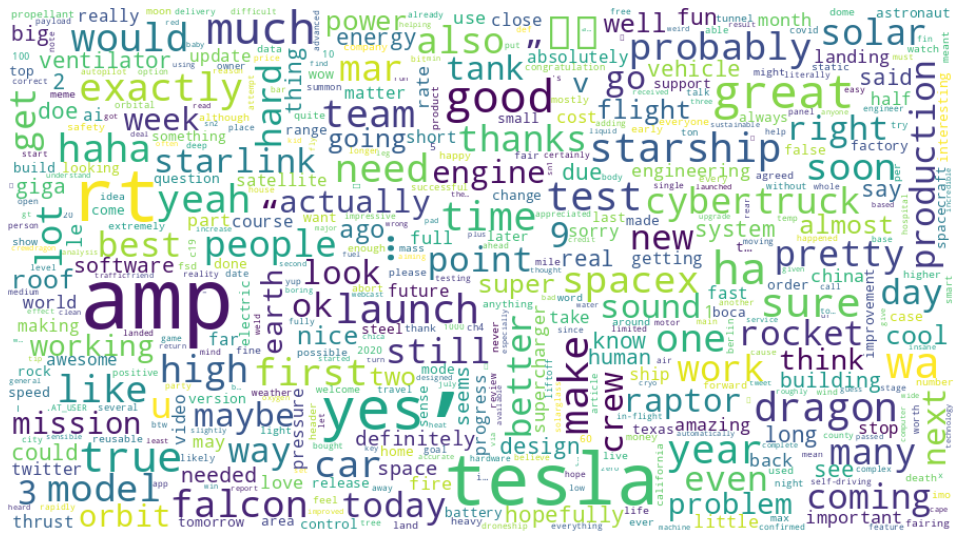

In [118]:
from collections import Counter
from wordcloud import WordCloud

wordfreq = Counter(all_words)

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      background_color="white",
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


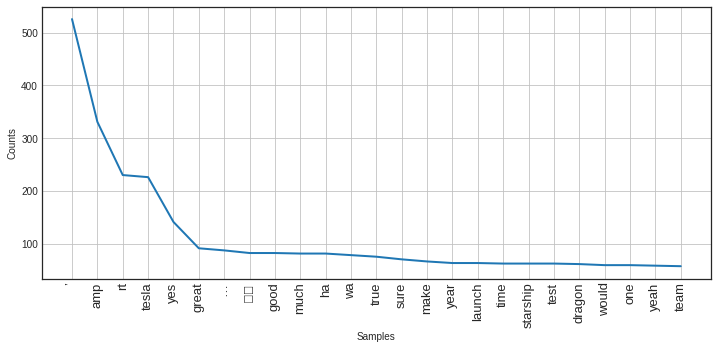

In [119]:
pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-white')
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

In [44]:
import pickle

with open('classifier_trained.pkl', 'rb') as fid:
    cl = pickle.load(fid)
  

In [45]:
cl.predict(['This sucks','its awesome'])

array(['negative', 'positive'], dtype='<U8')

In [46]:
tweets['sentiment_classfication'] = cl.predict(tweets['tweet_processed'])
tweets['sentiment_probability_neg'] = list(map(lambda el: el[0], cl.predict_proba(tweets['tweet_processed'])))
tweets['sentiment_probability_pos'] = list(map(lambda el: el[1], cl.predict_proba(tweets['tweet_processed'])))

tweets

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_classfication,sentiment_probability_neg,sentiment_probability_pos
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at n...,29,393,False,tesla add power lift gate cost,positive,0.394628,0.605372
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make...",19,121,False,agreed hydrogen fool sell make sense,negative,0.505230,0.494770
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck,positive,0.463178,0.536822
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from...",170,2842,False,also get lithium australia,negative,0.517546,0.482454
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want!...,877,3663,False,coup whoever want deal,positive,0.371226,0.628774
...,...,...,...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year,positive,0.482999,0.517001
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️,positive,0.499708,0.500292
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connecto...,70,1678,False,appears wiring/connector issue,negative,0.723233,0.276767
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try aga...,531,14533,False,igniter need inspected try tomorrow time,negative,0.709884,0.290116


In [47]:
tweets = pd.get_dummies(tweets, columns=['sentiment_classfication'])
tweets


,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_probability_neg,sentiment_probability_pos,sentiment_classfication_negative,sentiment_classfication_positive
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at n...,29,393,False,tesla add power lift gate cost,0.394628,0.605372,0,1
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make...",19,121,False,agreed hydrogen fool sell make sense,0.505230,0.494770,1,0
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck,0.463178,0.536822,0,1
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from...",170,2842,False,also get lithium australia,0.517546,0.482454,1,0
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want!...,877,3663,False,coup whoever want deal,0.371226,0.628774,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year,0.482999,0.517001,0,1
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️,0.499708,0.500292,0,1
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connecto...,70,1678,False,appears wiring/connector issue,0.723233,0.276767,1,0
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try aga...,531,14533,False,igniter need inspected try tomorrow time,0.709884,0.290116,1,0


In [48]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [49]:
tweets[tweets['created_at'] == '2020-05-16']

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_probability_neg,sentiment_probability_pos,sentiment_classfication_negative,sentiment_classfication_positive


In [50]:
tweets.dropna()

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_probability_neg,sentiment_probability_pos,sentiment_classfication_negative,sentiment_classfication_positive
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at n...,29,393,False,tesla add power lift gate cost,0.394628,0.605372,0,1
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make...",19,121,False,agreed hydrogen fool sell make sense,0.505230,0.494770,1,0
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck,0.463178,0.536822,0,1
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from...",170,2842,False,also get lithium australia,0.517546,0.482454,1,0
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want!...,877,3663,False,coup whoever want deal,0.371226,0.628774,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year,0.482999,0.517001,0,1
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️,0.499708,0.500292,0,1
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connecto...,70,1678,False,appears wiring/connector issue,0.723233,0.276767,1,0
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try aga...,531,14533,False,igniter need inspected try tomorrow time,0.709884,0.290116,1,0


In [73]:
import math
from functools import reduce

tweets_groupper= tweets.groupby(pd.Grouper(key='created_at', freq='1D'))

tweets_gropuped = pd.DataFrame()
tweets_gropuped['sentiment_count_neg'] = tweets_groupper['sentiment_classfication_negative'].sum()
tweets_gropuped['sentiment_count_pos'] = tweets_groupper['sentiment_classfication_positive'].sum()
tweets_gropuped['strongest_sentiment_class'] = tweets_gropuped['sentiment_count_pos'].subtract(tweets_gropuped['sentiment_count_neg']).map(lambda val: 'positive' if val >= 0 else 'nagative')
# tweets_gropuped['strongest_sentiment_value'] = tweets_groupper['sentiment_probability'].max().map(lambda sentiment: sentiment[1] if isinstance(sentiment, list) and not math.isnan(sentiment[1]) else 0)
tweets_gropuped['mean_positive'] = tweets_groupper['sentiment_probability_pos'].sum() / tweets_groupper['sentiment_classfication_positive'].count()

tweets_gropuped['ratio_pos/neg'] = tweets_gropuped['sentiment_count_pos'] / tweets_gropuped['sentiment_count_neg']
# tweets_gropuped = tweets_gropuped.dropna()
tweets_gropuped

,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,ratio_pos/neg
created_at,,,,,
2019-08-26,1,0,positive,0.424118,0.000000
2019-08-27,7,8,positive,0.517324,1.142857
2019-08-28,8,3,positive,0.436404,0.375000
2019-08-29,1,3,positive,0.630189,3.000000
2019-08-30,0,9,positive,0.637080,inf
...,...,...,...,...,...
2020-07-21,4,12,positive,0.584707,3.000000
2020-07-22,4,16,positive,0.560797,4.000000
2020-07-23,3,10,positive,0.624433,3.333333


In [74]:
prices = pd.read_csv('TSLA.csv')
prices['Date'] = pd.to_datetime(prices['Date'])
prices.tail()
 



,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-07-20,1519.010010,1650.000000,1488.000000,1643.000000,1643.000000,17121400
249,2020-07-21,1639.930054,1675.000000,1558.000000,1568.359985,1568.359985,16157300
250,2020-07-22,1599.000000,1626.420044,1562.000000,1592.329956,1592.329956,14161100
251,2020-07-23,1678.949951,1689.000000,1480.770020,1513.069946,1513.069946,24328500
252,2020-07-24,1416.010010,1465.000000,1366.540039,1417.000000,1417.000000,19344700


In [75]:
tweets_gropuped = tweets_gropuped.reset_index()
tweets_gropuped

,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,ratio_pos/neg
0,2019-08-26,1,0,positive,0.424118,0.000000
1,2019-08-27,7,8,positive,0.517324,1.142857
2,2019-08-28,8,3,positive,0.436404,0.375000
3,2019-08-29,1,3,positive,0.630189,3.000000
4,2019-08-30,0,9,positive,0.637080,inf
...,...,...,...,...,...,...
330,2020-07-21,4,12,positive,0.584707,3.000000
331,2020-07-22,4,16,positive,0.560797,4.000000
332,2020-07-23,3,10,positive,0.624433,3.333333
333,2020-07-24,3,13,positive,0.607763,4.333333


In [76]:
from workalendar.usa import NewYork
import datetime

cal = NewYork()

In [77]:

def stockValue(date, daysDifference, valueTime):
    date = cal.add_working_days(date,daysDifference)
    value = prices[prices['Date'] == date][valueTime].tolist()
    return None if len(value) == 0 else value[0]

tweets_gropuped['next_day_open'] = tweets_gropuped['created_at'].map(lambda date : stockValue(date,1,'Open')) 
tweets_gropuped['previous_day_open'] = tweets_gropuped['created_at'].map(lambda date : stockValue(date,-1,'Open')) 

tweets_gropuped


<ipython-input-77-2c0dbbebd0a9>:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  value = prices[prices['Date'] == date][valueTime].tolist()


,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,ratio_pos/neg,next_day_open,previous_day_open
0,2019-08-26,1,0,positive,0.424118,0.000000,215.740005,219.970001
1,2019-08-27,7,8,positive,0.517324,1.142857,213.690002,213.600006
2,2019-08-28,8,3,positive,0.436404,0.375000,219.000000,215.740005
3,2019-08-29,1,3,positive,0.630189,3.000000,229.149994,213.690002
4,2019-08-30,0,9,positive,0.637080,inf,224.080002,219.000000
...,...,...,...,...,...,...,...,...
330,2020-07-21,4,12,positive,0.584707,3.000000,1599.000000,1519.010010
331,2020-07-22,4,16,positive,0.560797,4.000000,1678.949951,1639.930054
332,2020-07-23,3,10,positive,0.624433,3.333333,1416.010010,1599.000000
333,2020-07-24,3,13,positive,0.607763,4.333333,NaN,1678.949951


In [78]:
tweets_gropuped = tweets_gropuped.dropna()

In [79]:
tweets_gropuped['price_change'] = (tweets_gropuped['next_day_open'] - tweets_gropuped['previous_day_open']) / (tweets_gropuped['previous_day_open'])
tweets_gropuped

<ipython-input-79-5a3405ec2bed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_gropuped['price_change'] = (tweets_gropuped['next_day_open'] - tweets_gropuped['previous_day_open']) / (tweets_gropuped['previous_day_open'])


,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,ratio_pos/neg,next_day_open,previous_day_open,price_change
0,2019-08-26,1,0,positive,0.424118,0.000000,215.740005,219.970001,-0.019230
1,2019-08-27,7,8,positive,0.517324,1.142857,213.690002,213.600006,0.000421
2,2019-08-28,8,3,positive,0.436404,0.375000,219.000000,215.740005,0.015111
3,2019-08-29,1,3,positive,0.630189,3.000000,229.149994,213.690002,0.072348
4,2019-08-30,0,9,positive,0.637080,inf,224.080002,219.000000,0.023196
...,...,...,...,...,...,...,...,...,...
328,2020-07-19,4,16,positive,0.586369,4.000000,1519.010010,1513.449951,0.003674
329,2020-07-20,4,5,positive,0.555895,1.250000,1639.930054,1513.449951,0.083571
330,2020-07-21,4,12,positive,0.584707,3.000000,1599.000000,1519.010010,0.052659
331,2020-07-22,4,16,positive,0.560797,4.000000,1678.949951,1639.930054,0.023794


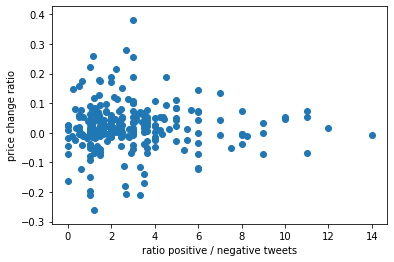

In [80]:
import matplotlib.pyplot as plt

plt.xlabel('ratio positive / negative tweets')
plt.ylabel('price change ratio')
plt.scatter(tweets_gropuped['ratio_pos/neg'], tweets_gropuped['price_change'])

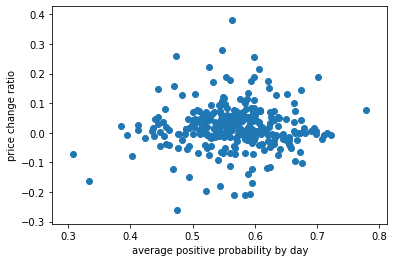

In [83]:
plt.xlabel('average positive probability by day')
plt.ylabel('price change ratio')
plt.scatter(tweets_gropuped['mean_positive'], tweets_gropuped['price_change'])